# TP 1 : Ensemble de Mandelbrot

On considère les suites complexes $(z_n)_{n\in\mathbb{N}}$ définies par :
$$
\begin{cases}
z_0=0\\
z_{n+1}=z_n^2+c
\end{cases}
\tag{$\star$}
$$
où $c$ est un nombre complexe donné.

L'ensemble des valeurs de $c$ pour lesquelles ces suites sont bornées est appelé ensemble de Mandelbrot et est noté $M$.

## 1. Type `complex`

- Créer une variable `z` contenant le nombre complexe $2+i$ (en utilisant le type `complex`). Afficher son contenu.

In [1]:
z = 2 + 1j
print(z)

(2+1j)


- Calculer $(0.5-0.5i)\times(3-0.25i)$ en Python.

In [2]:
z1 = .5 - .5j
z2 = 3 - .25j
print(z1 * z2)

(1.375-1.625j)


- Ecrire une fonction `evalz` qui prend en paramètres un entier `n` et un complexe `c` et renvoie la valeur au rang `n` de la suite de type ($\star$) associée à `c`.

In [3]:
def evalz(n: int, c: complex):
    """
    Renvoyer le complexe au rang n de la suite associée au complexe c.
    :param n: Rang n.
    :param c: Complexe c de la suite.
    :return: Complexe au rang n de la suite.
    
    >>> evalz(3, 1j)
    -1j
    """
    if n == 0:
        return 0
    else:
        return evalz(n-1, c) ** 2 + c

- A l'aide de la fonction `evalz`, calculer $z_{5}$ pour $c=2+3i$. On doit trouver $z_{5}=74713322+2847219465 i$.

In [4]:
print(evalz(5, 2 + 3j))

(74713322+2847219465j)


## 2. Représentation graphique de l'ensemble de Mandelbrot

- Ecrire une fonction `isinM` qui prend en paramètre un complexe `c` et détermine si `c` appartient à l'ensemble de Mandelbrot. Pour cela, utiliser la méthode élaborée en TD.

In [5]:
def isinM(c: complex):
    """
    Déterminer si un complexe c est dans l'emsemble de Mandelbrot.
    :param c: Complexe c.
    :return: Booléen.
    
    >>> isinM(.2 + .2j)
    True
    """
    z = 0
    for i in range(150):
        z = z ** 2 + c
        if abs(z) > 2:
            return False
    return True

- Ecrire une fonction `drawM` qui trace une représentation graphique de l'ensemble de Mandelbrot dans une zone rectangulaire du plan complexe :

$$ \{ z \in \mathbb{C} \:|\: x_{\rm min} \leq \operatorname{Re}(z) \leq x_{\rm max} \:\text{ et }\: y_{\rm min} \leq \operatorname{Im}(z) \leq x_{\rm max} \}.$$


Pour cela, balayer un ensemble fini de nombres complexes répartis sur une grille (suffisamment fine) couvrant cette zone et afficher dans une fenêtre graphique les points correspondant aux nombres complexes appartenant à l'ensemble de Mandelbrot.

On pourra utiliser la commande `plot` du module `matplotlib.pyplot` qui permet d'afficher une liste de points dans une fenêtre graphique.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def drawM(xMin: float, xMax: float, yMin: float, yMax: float, step: float):
    """
    Représenter graphiquement l'ensemble de Mandelbrot.
    :param xMin: x minimum.
    :param xMax: x maximum.
    :param yMin: y minimum.
    :param yMax: y maximum.
    :param step: Pas du balayage.
    """
    x = list()
    y = list()
    for z_real in np.arange(xMin, xMax + step, step):
        for z_imag in np.arange(yMin, yMax + step, step):
            if isinM(complex(z_real, z_imag)):
                x.append(z_real)
                y.append(z_imag)
    
    plt.scatter(x, y, c='k', s=.1)
    plt.axis('equal')
    plt.show()
    

- Tracer une représentation de la totalité de l'ensemble de Mandelbrot

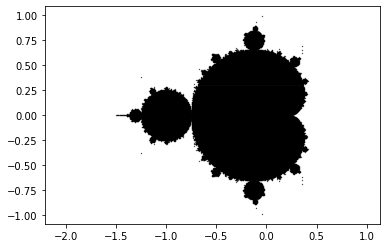

In [7]:
drawM(-1.5, .5, -1, 1, .005)

- Tracer une représentation plus précise de l'ensemble de Mandelbrot sur une zone frontière.

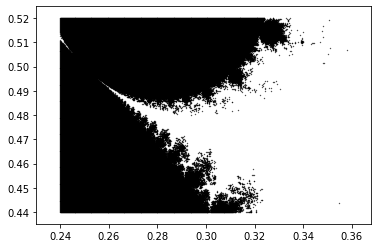

In [11]:
drawM(.24, .36, .44, .52, .0002)

## 3. Représentation graphique du rang d'échappement

Soit $c$ un nombre complexe appartenant au complémentaire de $M$. On appelle *rang d'échappement* de $c$ le rang à partir duquel la suite de type ($\star$) associée à $c$ dépasse 2 en module.

- Ecrire une fonction `esc_rank` qui prend en paramètre un complexe `c` et renvoie le rang d'échappement de `c` (ou `None` si `c` est dans l'ensemble de Mandelbrot).

In [12]:
def esc_rank(c: complex):
    """
    Déterminer le rang n à partir duquel la suite 
    associée au complexe c dépasse 2 en module.
    :param c: Complexe c.
    :return: Rang n.
    
    >>> esc_rank(.2 + .2j)
    None
    """
    z = 0
    for i in range(150):
        z = z ** 2 + c
        if abs(z) > 2:
            return i
    return None

- Ecrire une fonction `drawM_escrank` qui trace une représentation graphique du rang d'échappement dans une zone rectangulaire du plan complexe :

$$ \{ z \in \mathbb{C} \:|\: x_{\rm min} \leq \operatorname{Re}(z) \leq x_{\rm max} \:\text{ et }\: y_{\rm min} \leq \operatorname{Im}(z) \leq x_{\rm max} \}.$$


Pour cela, balayer un ensemble fini de nombres complexes répartis sur une grille (suffisamment fine) couvrant cette zone et afficher dans une fenêtre graphique les points correspondant aux nombres complexes appartenant au complémentaire de l'ensemble de Mandelbrot avec une couleur dépendant de leur rang d'échappement.

On pourra utiliser la commande `scatter` du module `matplotlib.pyplot` qui permet d'afficher une liste de points dans une fenêtre graphique avec des couleurs différentes.

In [15]:
def drawM_escrank(xMin: float, xMax: float, yMin: float, yMax: float, step: float):
    """
    Représenter graphiquement l'ensemble de Mandelbrot.
    :param xMin: x minimum.
    :param xMax: x maximum.
    :param yMin: y minimum.
    :param yMax: y maximum.
    :param step: Pas du balayage.
    """
    x = list()
    y = list()
    colors = list()
    for z_real in np.arange(xMin, xMax + step, step):
        for z_imag in np.arange(yMin, yMax + step, step):
            n=esc_rank(complex(z_real, z_imag))
            x.append(z_real)
            y.append(z_imag)
            if n is not None:
                colors.append(n)
            else:
                colors.append(42)
                
    
    plt.scatter(x, y, c=colors, s=.1)
    plt.axis('equal')
    plt.show()
    
    

- Tracer une représentation de la totalité de l'ensemble de Mandelbrot

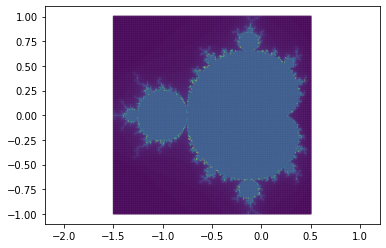

In [16]:
drawM_escrank(-1.5, .5, -1, 1, .007)

- Tracer une représentation plus précise de l'ensemble de Mandelbrot sur une zone frontière.

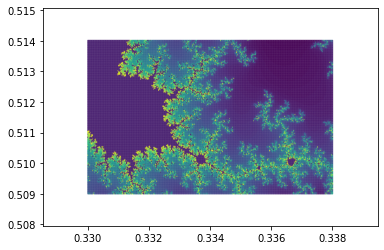

In [17]:
drawM_escrank(.33, .338, .509, .514, .000023)

## 4. Aire de l'ensemble de Mandelbrot (facultatif)

- Ecrire une fonction `areaM` qui calcule (de manière approchée) l'aire de l'ensemble de Mandelbrot.

## 5. Ensembles de Julia (facultatif)

Soit $c\in \mathbb{C}$. On considère les suites complexes $(z_n)_{n\in\mathbb{N}}$ définies par :
$$
\begin{cases}
z_0=\alpha\\
z_{n+1}=z_n^2+c
\end{cases}
\tag{$\star \star$}
$$
où $\alpha$ est un nombre complexe donné.

L'ensemble des valeurs de $\alpha$ pour lesquelles ces suites sont bornées est appelé *ensemble de Julia associé à $c$* et est noté $J_c$.

- Ecrire une fonction `drawJ` qui trace une représentation graphique de l'ensemble de Julia associé à un nombre complexe $c$ donné dans une zone rectangulaire du plan complexe :

$$ \{ z \in \mathbb{C} \:|\: x_{\rm min} \leq \operatorname{Re}(z) \leq x_{\rm max} \:\text{ et }\: y_{\rm min} \leq \operatorname{Im}(z) \leq x_{\rm max} \}.$$

In [105]:
def drawJ(c: complex, xMin: float, xMax: float, yMin: float, yMax: float, step: float):
    """
    Représenter graphiquement l'ensemble de Julia.
    :param c: Complexe donné.
    :param xMin: x minimum.
    :param xMax: x maximum.
    :param yMin: y minimum.
    :param yMax: y maximum.
    :param step: Pas du balayage.
    """
    def isinJ(z: complex):
        for i in range(150):
            z = z ** 2 + c
            if abs(z) > 2:
                return False
        return True
    
    x = list()
    y = list()
    for z_real in np.arange(xMin, xMax + step, step):
        for z_imag in np.arange(yMin, yMax + step, step):
            if isinJ(complex(z_real, z_imag)):
                x.append(z_real)
                y.append(z_imag)
    
    plt.scatter(x, y, c='k', s=.1)
    plt.axis('equal')
    plt.show()

- Tracer l'ensemble de Julia pour $c=-0.4+0.6i$.

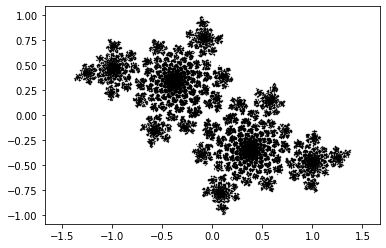

In [80]:
drawJ(complex(-.4+.6j), -1.5, 1.5, -1, 1, .002)

- Tracer des ensembles de Julia associés à d'autres valeurs.

*Lapin de Douady (de multiplicité 3) :*

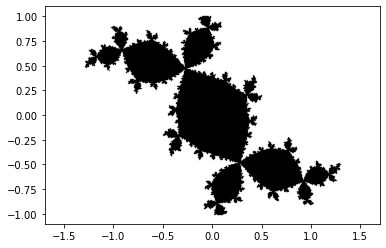

In [81]:
drawJ(complex(-.123 + .745j), -1.5, 1.5, -1, 1, .005)

*Lapin de Douady (de multiplicité 4) :*

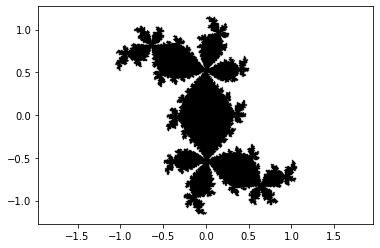

In [82]:
drawJ(complex(.28 + .53j), -1.5, 1.5, -1.5, 1.5, .005)

*Le chou-fleur :*

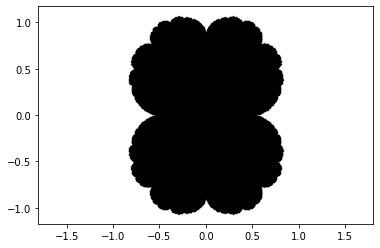

In [59]:
drawJ(complex(.25), -1.5, 1.5, -1.5, 1.5, .005)